### 7.1 캐니 엣지 검출

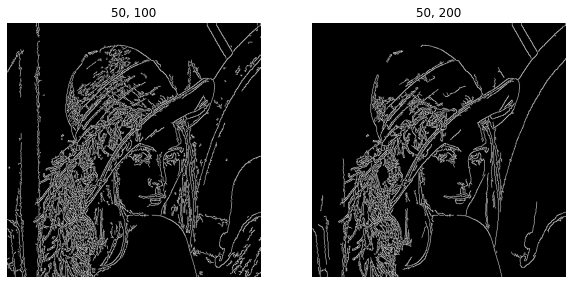

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg', cv2.IMREAD_GRAYSCALE)

edge1 = cv2.Canny(src, 50, 100)
edge2 = cv2.Canny(src, 50, 200)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('50, 100')
ax[0].imshow(edge1, cmap='gray')

ax[1].axis('off')
ax[1].set_title('50, 200')
ax[1].imshow(edge2, cmap='gray')
plt.show()

### 7.2 허프 변환, HoughLines

(4, 1, 2)


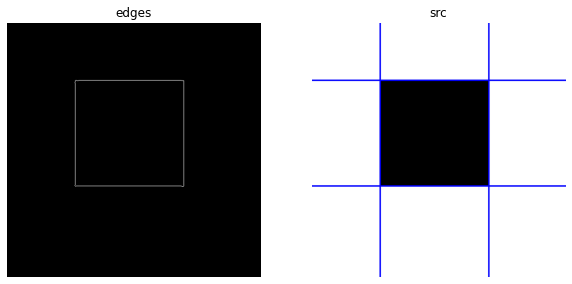

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/rect.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50 ,100)

# 허프 변환을 통해 선 검출
# rho = 1, 작을 수록 정교해짐 (0~1)
# theta = np.pi/180.0, 각도의 간격 pi/180은 간격이 1도씩이다. (np.pi/0~180)
# threshold = 100, 100보다 큰 값들을 edge로 한다. (작은 값: 정확도 감소, 검출 개수 증가 / 큰 값: 정확도 증가, 검출 개수 감소)
lines = cv2.HoughLines(edges, 1, np.pi/180.0, 100)
print(lines.shape)

for line in lines:
    rho, theta = line[0]
    # cos, sin
    c = np.cos(theta)
    s = np.sin(theta)
    
    # x, y 기준(절편) 좌표
    x0 = c * rho
    y0 = s * rho
    
    # 직선 방정식으로 그리기 위한 시작점, 끝점 계산
    x1 = int(x0 + 1000 * (-s))
    y1 = int(y0 + 1000 * (c))
    x2 = int(x0 - 1000 * (-s))
    y2 = int(y0 - 1000 * (c))
    
    # 원본에 선 그림
    cv2.line(src, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('edges')
ax[0].imshow(edges, cmap='gray')

ax[1].axis('off')
ax[1].set_title('src')
ax[1].imshow(src)

# cv2.imshow('edges', edges)
# cv2.imshow('src', src)
# cv2.waitKey()
# cv2.destroyAllWindows()

### 7.3 선분 검출 HoughLinesP

* 허프 선 검출은 모든 점에 대해 수많은 선을 그어서 직선을 찾기 때문에 연산량이 무척 많습니다. 이를 개선하기 위한 방법이 확률적 허프 선 변환입니다

(4, 1, 4)


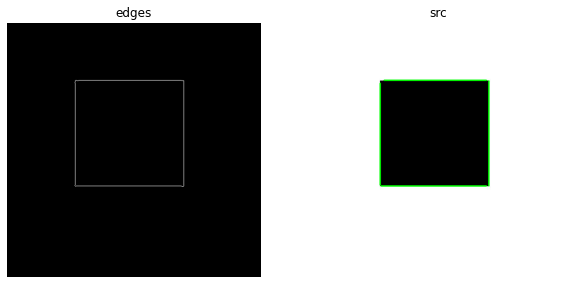

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/rect.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)


lines = cv2.HoughLinesP(edges, 1, np.pi/180.0, 100)
print(lines.shape)

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(src, (x1, y1), (x2, y2), (0, 255, 0), 2)

fig, ax = plt.subplots(1, 2, figsize = (10, 10)) # 2 x 2 서브플롯을 (10, 10)의 크기로 생성
fig.canvas.manager.set_window_title('plt') # 창 이름

ax[0].axis('off')
ax[0].set_title('edges')
ax[0].imshow(edges, cmap='gray')

ax[1].axis('off')
ax[1].set_title('src')
ax[1].imshow(src)

# cv2.imshow('edges', edges)
# cv2.imshow('src', src)
# cv2.waitKey()
# cv2.destroyAllWindows()


### 7.4 원 검출 HoughCircles

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 1
src1 = cv2.imread('c:/data/circles.jpg')
gray1 = cv2.cvtColor(src1, cv2.COLOR_BGR2GRAY)

# img: 입력 이미지, 1채널 배열
# method: 검출 방식 선택 (현재 cv2.HOUGH_GRADIENT만 가능)
# dp: 입력 영상과 경사 누적의 해상도 반비례율, 1: 입력과 동일, 값이 커질수록 부정확
# minDist: 원들 중심 간의 최소 거리 (0: 에러, 0이면 동심원이 검출 불가하므로)
# circles(optional): 검출 원 결과, N x 1 x 3 부동 소수점 배열 (x, y, 반지름)
# param1(optional): 캐니 엣지에 전달할 스레시홀드 최대 값 (최소 값은 최대 값의 2배 작은 값을 전달)
# param2(optional): 경사도 누적 경계 값 (값이 작을수록 잘못된 원 검출)
# minRadius, maxRadius(optional): 원의 최소 반지름, 최대 반지름 (0이면 이미지 전체의 크기)
circles1 = cv2.HoughCircles(gray1, cv2.HOUGH_GRADIENT, 1, 50, param2=15)

circles1 = np.int32(circles1)
print(circles1.shape)
for circle in circles1[0,:]:
    # cx, cy 중심좌표
    # r 반지름
    cx, cy, r = circle
    cv2.circle(src1, (cx, cy), r, (0, 0, 255), 2)
cv2.imshow('src1', src1)

# 2
src2 = cv2.imread('c:/data/circles2.jpg')
gray2 = cv2.cvtColor(src2, cv2.COLOR_BGR2GRAY)
circles2 = cv2.HoughCircles(gray2, cv2.HOUGH_GRADIENT, 1, 50, param2=15, minRadius=30, maxRadius=100)

circles2 = np.int32(circles2)
print(circles2)
for circle in circles2[0,:]:
    cx, cy, r = circle
    cv2.circle(src2, (cx, cy), r, (0, 0, 255), 2)
cv2.imshow('src2', src2)
    
cv2.waitKey()
cv2.destroyAllWindows()

(1, 3, 3)
[[[370 147  62]
  [345 391  53]
  [229 219  75]
  [242 385  47]
  [429 233  54]
  [119 219  49]]]


### 7.15 레이블링, 물체 구분

In [9]:
import cv2
import numpy as np

#1
src = cv2.imread('c:/data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, res = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

#2
# 픽셀이 0 이면 배경, 0이 아니면 물체
ret, labels = cv2.connectedComponents(res)
print('ret= ', ret)

vMin, vMax, lMin, lMax = cv2.minMaxLoc(labels)
print(vMin, vMax, lMin, lMax)

# 0은 배경 3은 물체
print(labels[335:345, 330:340])

#3
dst = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels==i] = [b, g, r]

cv2.imshow('res', res)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

ret=  4
0.0 3.0 (0, 0) (339, 338)
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3]
 [0 0 0 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3]]
